# Лабораторная работа №3. Метод k-ближайших соседей

In [88]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #обучающая и тестовая выборка
from sklearn.neighbors import KNeighborsClassifier   #алгоритм k-nn

Функция load_digits из модуля sklearn.datasets возвращает объект scikitlearn Bunch, содержащий данные цифр и информацию о наборе данных Digits

In [89]:
 digits = load_digits()

Исходный набор данных UCI содержит 5620 образцов: 3823 для обучения
и 1797 для тестирования.
Атрибут DESCR объекта Bunch содержит описание тестового набора данных. Каждый образец содержит 64 признака (Number of Attributes), представляющие изображение 8 × 8 со значениями пикселов в диапазоне 0–16 (Attribute
Information)

In [90]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### Проверка атрибутов data и target

Массив data содержит 1797 образца (изображения цифр), каждый из которых несет 64 признака со значениями в диапазоне 0–16, представляющие интенсивности пикселей. 
Интенсивность проявляется в диапазоне: от белого (0) до черного (16).

In [91]:
print("Размер массива data:", digits.data.shape)
digits.data[::100]

Размер массива data: (1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ..., 11.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 13.,  2.,  0.],
       [ 0.,  2., 13., ...,  7.,  1.,  0.],
       [ 0.,  0.,  4., ...,  1.,  0.,  0.]])

Массив target содержит метки изображений, то есть классы, указывающие, какую цифру представляет каждое изображение.

In [92]:
print("Размер массива target:", digits.target.shape)
digits.target[::100]

Размер массива target: (1797,)


array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

#### Пример изображения цифры

Атрибут images — массив, каждый элемент которого представляет собой двумерный массив 8×8
с интенсивностями пикселоей изображения цифры. Хранятся в виде значений с плавающей точкой типа float64.

Выведем двумерный массив, представляющий изображение образца с индексом 0.
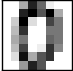

In [93]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

#### Подготовка данных для использования со scikit-learn

Для представления каждого образца в виде одной строки данных многомерные
данные должны быть преобразованы в одномерный массив. 

Первые восемь элементов содержат элементы строки 0 двумерного массива, следующие восемь — элементы строки 1
двумерного массива, и т. д.

In [94]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Визуализация данных

#### Создание диаграммы

<IPython.core.display.Javascript object>


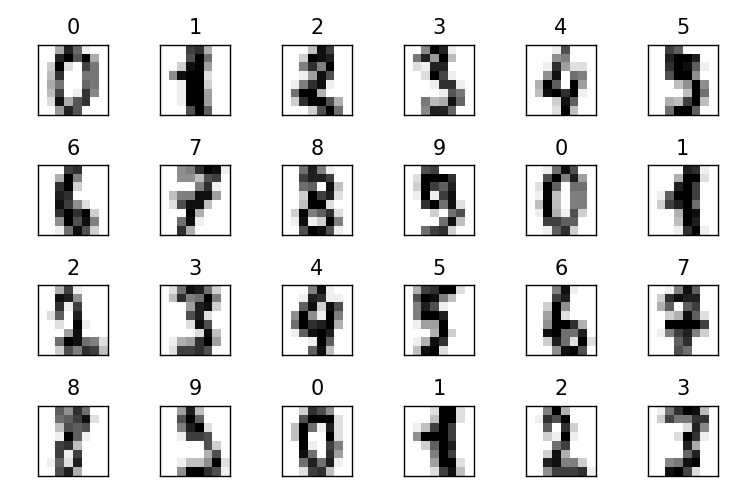

In [95]:
%matplotlib notebook
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

#### Вывод изображений и удаление меток осей
zip - для параллельного перебора всех 24 объектов Axes, первых 24 изображений в digits.images и первых 24 значений в digits.target.

imshow - для вывода одного изображения, аргумент cmap=plt.cm.gray_r определяет цвета, выводимые
в изображении.

set_xticks и set_yticks - оси x и y должны выводиться без делений.

set_title - вывод целевого значения над
изображением.

tight_layout - удаление лишнего поля совсех краев Figure.

In [96]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([]) 
    axes.set_title(target) 
plt.tight_layout() 

##  Разбиение данных для обучения и тестирования

Функция train_test_split из модуля sklearn.model_selection осуществляет
случайную перестановку данных, а затем разбивает образцы в массиве data
и целевые значения в массиве target на обучающий и тестовый набор. Это
гарантирует, что обучающий и тестовый наборы обладают сходными характеристиками.

Она возвращает кортеж из четырех элементов, в котором два
первых элемента содержат образцы, разделенные на обучающий и тестовый
набор, а два последних — соответствующие целевые значения, также разделенные на обучающий и тестовый набор.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

По умолчанию train_test_split резервирует 75% данных для обучения и 25% для тестирования.

In [98]:
print("Размер тестового набора:", X_train.shape, "\nРазмер обучающего набора:", X_test.shape)

Размер тестового набора: (1347, 64) 
Размер обучающего набора: (450, 64)


Аргумент test_size задает пользовательское соотношение между тестовым и обучающим набором.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target, random_state=11, test_size=0.20)

## Создание модели

Оценщик KNeighborsClassifier (модуль sklearn.neighbors) реализует алгоритм k ближайших соседей. Сначала создается объект.

In [100]:
knn = KNeighborsClassifier()

fit() - загружает обучающий набор образцов (X_train) и обучающий набор целевых
значений (y_train) в оценщике.

In [101]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

Метод predict с передачей X_test возвращает массив, содержащий прогнозируемый класс каждого тестового изображения.

In [102]:
predicted = knn.predict(X=X_test)

In [103]:
expected = y_test

Сравним первые 20 прогнозируемых и тестовых образцов.

In [104]:
print("Тестовый набор: ", predicted[:20], "\nОбучающий набор:", expected[:20])


Тестовый набор:  [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6] 
Обучающий набор: [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]


Воспользуемся трансформацией списка для нахождения всех ошибочных прогнозов для всего тестового набора, то есть тех случаев, в которых значения из массивов predicted и expected не совпадают.

In [105]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3), (8, 9), (4, 9), (7, 3), (7, 4)]

In [106]:
from sklearn.metrics import confusion_matrix       #матрица несоответствий
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold           #кросс-валидация
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVC                         #оценщик SVC
from sklearn.naive_bayes import GaussianNB          #оценщик GaussianNB

## Метрики точности модели

Метод score оценщика

In [107]:
print(f'{knn.score(X_test, y_test):.2%}')

98.61%


Матрица несоответствий (содежит информацию о правильно и неправильно спрогнозированных значениях)

In [108]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]], dtype=int64)

#### Отчет по классификации

Вывод таблицы метрик классификации, основанных на ожидаемых и прогнозируемых значениях.

precision — точность, то есть общее количество точных прогнозов для заданной цифры, разделенное на общее количество прогнозов для этой цифры;

recall — отклик, то есть общее количество правильных прогнозов для заданной цифры, разделенное на общее количество образцов, которые должны были прогнозироваться как эта цифра;

f1-score — среднее значение точности и отклика;

support — количество образцов с заданным ожидаемым значением. 

In [109]:
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## Визуализация матрицы несоответствий

Преобразование матрицы несоответствий в коллекцию DataFrame.
Построение ее визуального представления.

<IPython.core.display.Javascript object>


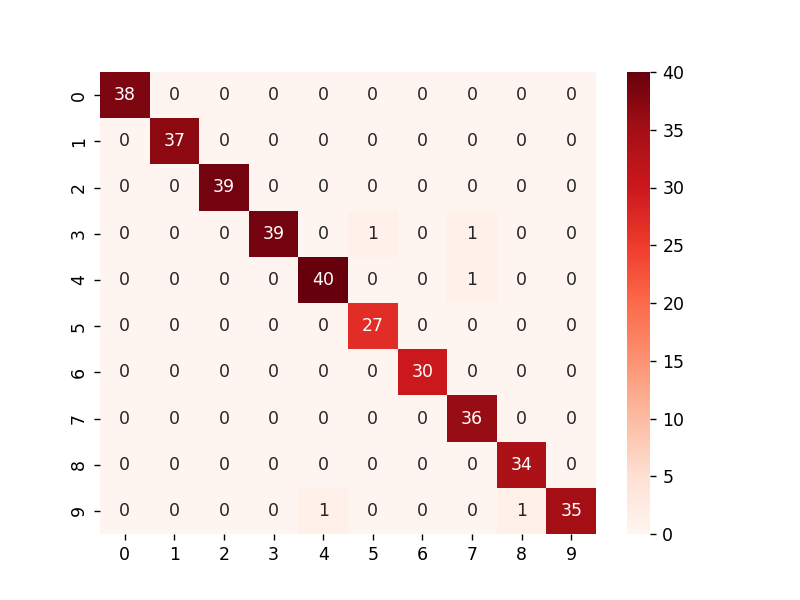

In [110]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))
axes = sns.heatmap(confusion_df, annot=True, cmap='Reds')

## K-проходная перекрестная проверка

Создание объекта KFold

In [111]:
 kfold = KFold(n_splits=10, random_state=11, shuffle=True)

Ключевые аргументы:

n_splits=10 — количество частей;

random_state=11 — значение инициализации генератора случайных чисел для обеспечения воспроизводимости результатов;

shuffle=True — объект KFold выполняет случайную перестановку данных перед разбиением их на части.

#### Использование объекта KFold с функцией cross_val_score

Функция cross_val_score возвращает массив показателей точности — по одной для каждой части.

In [112]:
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

Ключевые аргументы:

estimator=knn — оценщик, который вы хотите проверить;

X=digits.data — образцы, используемые для обучения и тестирования;

y=digits.target — прогнозы целевых значений для образцов;

cv=kfold — генератор перекрестной проверки, определяющий способ разбиения образцов и целевых значений для обучения и тестирования.

In [113]:
print(f'Средний показатель точности: {scores.mean():.2%}')
print(f'Стандартное отклонение: {scores.std():.2%}')

Средний показатель точности: 98.78%
Стандартное отклонение: 0.74%


#### Выполнение SVC и GaussianNB для поиска наилучшей

In [114]:
estimators = { 'KNeighborsClassifier': knn, 'SVC': SVC(gamma='scale'), 'GaussianNB': GaussianNB()}
for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.78%; standard deviation=0.74%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


Оценщик KNeighborsClassifier обеспечивает лучшую точность.
Точности оценщиков KNeighborsClassifier и SVC почти идентичны, поэтому
стоит провести настройку гиперпараметров каждого оценщика для выбора
лучшего варианта.

#### Настройка гиперпараметров

Чтобы определить лучшее значение k в алгоритме k-NN, нужно сравнить эффективность оценщика с разными значениями k. 
Следующий цикл создает объект KNeighborsClassifiers с нечетными значениями k от 1 до 19.

In [115]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.78%; standard deviation=0.74%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.83%; standard deviation=0.95%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


Из полученных оценок точности и стандартных отклонений, можно сделать вывод, что при значении k = 1
достигается наибольшая точность прогнозирования для набора данных Digits.
Рост значений k ведет к снижению точности.